# Summary

let's draw some sheep

In [51]:
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms, utils

from draw_strokes import draw_strokes, make_grid_svg

In [14]:
train = np.load("Sheep_Market/train.npy", encoding='latin1')
test = np.load("Sheep_Market/test.npy", encoding='latin1')
valid = np.load("Sheep_Market/valid.npy", encoding='latin1')

print("train: '{}', test: '{}', valid: '{}'".format(train.shape, test.shape, valid.shape))

train: '(7400,)', test: '(300,)', valid: '(300,)'


In [53]:
class SheepDataset(Dataset):
    """ 
    Reference: 
        https://www.kaggle.com/leighplt/pytorch-starter-kit 
    """
    
    def __init__(self, npyfpath, mode='train'):
        self.dataset = np.load(npyfpath, encoding='latin1')
        self.mode = mode
     
    @staticmethod
    def _get_bounds(data, factor):
        min_x = 0
        max_x = 0
        min_y = 0
        max_y = 0

        abs_x = 0
        abs_y = 0
        for i in range(len(data)):
            x = float(data[i,0])/factor
            y = float(data[i,1])/factor
            abs_x += x
            abs_y += y
            min_x = min(min_x, abs_x)
            min_y = min(min_y, abs_y)
            max_x = max(max_x, abs_x)
            max_y = max(max_y, abs_y)

        return (min_x, max_x, min_y, max_y)
        
    @staticmethod
    def _draw_strokes(data, factor=0.8, svg_filename = 'sample.svg'):
        """ Displays vector images and saves them to .svg """
        min_x, max_x, min_y, max_y = self._get_bounds(data, factor)
        dims = (50 + max_x - min_x, 50 + max_y - min_y)
        dwg = svgwrite.Drawing(svg_filename, size=dims)
        dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
        lift_pen = 1
        abs_x = 25 - min_x 
        abs_y = 25 - min_y
        p = "M%s,%s " % (abs_x, abs_y)
        command = "m"
        for i in range(len(data)):
            if (lift_pen == 1):
                command = "m"
            elif (command != "l"):
                command = "l"
            else:
                command = ""
            x = float(data[i,0])/factor
            y = float(data[i,1])/factor
            lift_pen = data[i, 2]
            p += command+str(x)+","+str(y)+" "
        the_color = "black"
        stroke_width = 1
        dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
        dwg.save()
        display(SVG(dwg.tostring()))
        
    def __len__(self):
        return self.dataset.shape[0]
    
    def __getitem__(self, idx):
        pass
    

# 2.1 Rendering

Let's meet the sheep.

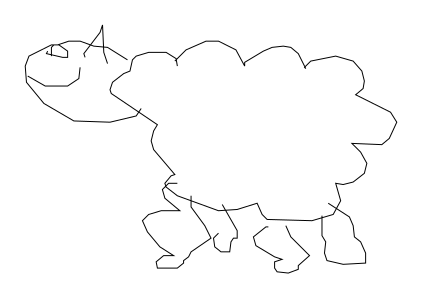

In [20]:
draw_strokes(train[0])

In [35]:
samples = train[:4].tolist()


In [38]:
# generate a 2D grid of many vector drawings
def make_grid_svg(s_list, grid_space=10.0, grid_space_x=15.0):
    def get_start_and_end(x):
        x = np.array(x)
        x = x[:, 0:2]
        x_start = x[0]
        x_end = x.sum(axis=0)
        x = x.cumsum(axis=0)
        x_max = x.max(axis=0)
        x_min = x.min(axis=0)
        center_loc = (x_max+x_min)*0.5
        return x_start-center_loc, x_end
    x_pos = 0.0
    y_pos = 0.0
    result = [[x_pos, y_pos, 1]]
    for sample in s_list:
        s = sample[0]
        grid_loc = sample[1]
        grid_y = grid_loc[0]*grid_space+grid_space*0.5
        grid_x = grid_loc[1]*grid_space_x+grid_space_x*0.5
        start_loc, delta_pos = get_start_and_end(s)

        loc_x = start_loc[0]
        loc_y = start_loc[1]
        new_x_pos = grid_x+loc_x
        new_y_pos = grid_y+loc_y
        result.append([new_x_pos-x_pos, new_y_pos-y_pos, 0])

        result += s.tolist()
        result[-1][2] = 1
        x_pos = new_x_pos+delta_pos[0]
        y_pos = new_y_pos+delta_pos[1]
    return np.array(result)

In [39]:
make_grid_svg(samples)

(3,)


IndexError: too many indices for array

In [43]:
def get_start_and_end(x):
        x = np.array(x)
        x = x[:, 0:2]
        x_start = x[0]
        x_end = x.sum(axis=0)
        x = x.cumsum(axis=0)
        x_max = x.max(axis=0)
        x_min = x.min(axis=0)
        center_loc = (x_max+x_min)*0.5
        return x_start-center_loc, x_end

In [41]:
m = train[:4]

In [42]:
m.shape

(4,)

In [47]:
get_start_and_end(m[0])

(array([-29. , -70.5]), array([125, 110]))

In [50]:
m[0].shape

(156, 3)